# Europe Gas Dependencies with networkx

## Data Loading & Cleaning

### Loading the Data

In [111]:
# Import the required libraries
import pandas as pd
from google.colab import drive
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# Mount your Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In a first step the data has to be loaded. The required CSV-Files are loaded to the Google-Drive and are loaded from there.

In [3]:
def loading_data(data_folder):

  """ The function takes as an argument the path to your Google Drive and is
      loading the data as dataframes and returns them. """

  # Define a list with all the paths
  files = ["product_codes_HS92_V202201.csv",
           "country_codes_V202201.csv",
           "BACI_HS92_Y2000_V202201.csv",
           "BACI_HS92_Y2005_V202201.csv",
           "BACI_HS92_Y2010_V202201.csv",
           "BACI_HS92_Y2015_V202201.csv",
           "BACI_HS92_Y2020_V202201.csv"]

  # Define the paths to the files
  product_code = data_folder/files[0]
  country_code = data_folder/files[1]
  data_2000 = data_folder/files[2]
  data_2005 = data_folder/files[3]
  data_2010 = data_folder/files[4]
  data_2015 = data_folder/files[5]
  data_2020 = data_folder/files[6]

  # Define the Dataframes
  df_product_code = pd.read_csv(product_code)
  df_country_code = pd.read_csv(country_code, encoding='latin-1')
  df_2000 = pd.read_csv(data_2000)
  df_2005 = pd.read_csv(data_2005)
  df_2010 = pd.read_csv(data_2010)
  df_2015 = pd.read_csv(data_2015)
  df_2020 = pd.read_csv(data_2020)
  
  # Return the dataframes
  return df_product_code, df_country_code, df_2000, df_2005, df_2010, df_2015, df_2020

# Call the function
df_product_code, df_country_code, df_2000_all, df_2005_all, df_2010_all, df_2015_all, df_2020_all = loading_data(Path("/content/drive/MyDrive/Colab Notebooks/Social Interaction Project/"))

### Check the Data

Now the loaded data is checked. The file for the product categories, country codes and the values is checked.

**Product Categories**

In [4]:
df_product_code.head(5)

,code,description
0,010111,"Horses: live, pure-bred breeding animals"
1,010119,"Horses: live, other than pure-bred breeding an..."
2,010120,"Asses, mules and hinnies: live"
3,010210,"Bovine animals: live, pure-bred breeding animals"
4,010290,"Bovine animals: live, other than pure-bred bre..."


**Country Codes**

In [5]:
df_country_code.head(5)

,country_code,country_name_abbreviation,country_name_full,iso_2digit_alpha,iso_3digit_alpha
0,4,Afghanistan,Afghanistan,AF,AFG
1,8,Albania,Albania,AL,ALB
2,12,Algeria,Algeria,DZ,DZA
3,16,American Samoa,American Samoa,AS,ASM
4,20,Andorra,Andorra,AD,AND


In [6]:
df_country_code.dtypes

country_code                  int64
country_name_abbreviation    object
country_name_full            object
iso_2digit_alpha             object
iso_3digit_alpha             object
dtype: object

**Import / Export Data**

In [7]:
df_2020_all.head(5)

,t,i,j,k,v,q
0,2020,4,31,251512,27.426,169.800
1,2020,4,32,391000,0.044,0.009
2,2020,4,32,401010,0.164,NA
3,2020,4,32,610120,0.012,0.003
4,2020,4,36,71120,0.718,0.308


In [8]:
# Check one of the value dataframes
df_2020_all.dtypes

t      int64
i      int64
j      int64
k      int64
v    float64
q     object
dtype: object

### Subset Data

#### Product Category Filter

We need to filter the product categories by "Petroleum Gases" to get the categories representing liquified gas. 

- Petroleum gases and other gaseous hydrocarbons: liquefied, natural gas
- Petroleum gases and other gaseous hydrocarbons: liquefied, propane
- Petroleum gases and other gaseous hydrocarbons: liquefied, butanes
- Petroleum gases and other gaseous hydrocarbons: liquefied, ethylene, propylene, butylene and butadiene
- Petroleum gases and other gaseous hydrocarbons: liquefied, n.e.s. in heading no. 2711
- Petroleum gases and other gaseous hydrocarbons: in gaseous state, natural gas
<br>
<br>

Furthermore, coal might also be interesting to filter

- Coal: anthracite, whether or not pulverised, but not agglomerated
- Coal: bituminous, whether or not pulverised, but not agglomerated
- Coal: (other than anthracite and bituminous), whether or not pulverised but not agglomerated
- Gases: coal, water, producer and similar gases (excluding petroleum and other gaseous hydrocarbons)
<br>
<br>

Categories for oil:

- Oils: petroleum oils and oils obtained from bituminous minerals, crude
- Petroleum oils and oils from bituminous minerals, not crude: preparations n.e.c. containing by weight 70% or more of petroleum oils or oils from bituminous minerals: these being the basic constituents of the preparations: waste oils
<br>
<br>

These are the product-codes referred to the petroleum gases:

- 271111
- 271112
- 271113
- 271114
- 271119
- 271121

#### Country Code Filter

In a first step we rename the dataframes holding values for the import and export qty and value. We only filter for the importing country, which is per definition of the research questions Switzerland, France and Germany. This will then return a list of exporting countries which we will trace down to the "source".

**Countries to consider:**

- GER: 276
- CHE: 757
- FRA: 251

In [9]:
def rename_and_subset(df1, df2, df3, df4, df5):

  """ The function takes as arguments several dataframes and does the same trans-
      formations on these dataframes. The function is written for the """

  # Define the input variables in a list also define the search paramters in a list
  dataframes = [df1, df2, df3, df4, df5]
  product_codes = [271111, 271112, 271113, 271114, 271119, 271121]
  countries = [251, 757, 276, 579, 56]


  # Iterate over the dataframe in the list and rename the columns
  for dataframe in dataframes:
    dataframe.rename({"t": "year",
                      "i": "exporter", 
                      "j": "importer",
                      "k": "product",
                      "v": "value",
                      "q": "quantity" 
                      }, axis=1, inplace = True)

  # Subset the dataframes and filter for petroleum gases
  df1 = df1[df1["product"].isin(product_codes)]
  df2 = df2[df2["product"].isin(product_codes)]
  df3 = df3[df3["product"].isin(product_codes)]
  df4 = df4[df4["product"].isin(product_codes)]
  df5 = df5[df5["product"].isin(product_codes)]

  df1 = df1[df1["importer"].isin(countries)]
  df2 = df2[df2["importer"].isin(countries)]
  df3 = df3[df3["importer"].isin(countries)]
  df4 = df4[df4["importer"].isin(countries)]
  df5 = df5[df5["importer"].isin(countries)]


  # Return the subsetted dataframes
  return df1, df2, df3, df4, df5

# Call the function
df_2000, df_2005, df_2010, df_2015, df_2020 = rename_and_subset(df_2000_all, df_2005_all, df_2010_all, df_2015_all, df_2020_all)  

Now we check the filtered and transformed dataframes for missing values.

In [10]:
# Check the dataframes for missing values
dataframes = [df_2000, df_2005, df_2010, df_2015, df_2020]

for dataframe in dataframes:
  print(dataframe.isna().sum())
  print(80*"*")

year        0
exporter    0
importer    0
product     0
value       0
quantity    0
dtype: int64
********************************************************************************
year        0
exporter    0
importer    0
product     0
value       0
quantity    0
dtype: int64
********************************************************************************
year        0
exporter    0
importer    0
product     0
value       0
quantity    0
dtype: int64
********************************************************************************
year        0
exporter    0
importer    0
product     0
value       0
quantity    0
dtype: int64
********************************************************************************
year        0
exporter    0
importer    0
product     0
value       0
quantity    0
dtype: int64
********************************************************************************


In [11]:
# Check the datatypes for the dataframes
for dataframe in dataframes:
  print(dataframe.dtypes)
  print(80*"*")

year          int64
exporter      int64
importer      int64
product       int64
value       float64
quantity     object
dtype: object
********************************************************************************
year          int64
exporter      int64
importer      int64
product       int64
value       float64
quantity     object
dtype: object
********************************************************************************
year          int64
exporter      int64
importer      int64
product       int64
value       float64
quantity     object
dtype: object
********************************************************************************
year          int64
exporter      int64
importer      int64
product       int64
value       float64
quantity     object
dtype: object
********************************************************************************
year          int64
exporter      int64
importer      int64
product       int64
value       float64
quantity     object
dtype: object
******

#### Merging the dataframes

In [12]:
# Delete the rows with a not mergable value
to_delete = df_product_code[df_product_code["code"] == "9999AA"].index
df_product_code = df_product_code.drop(to_delete)

In [13]:
# Change the datatype of the column to integer
df_product_code["code"] = df_product_code["code"].astype("int")
df_product_code.dtypes

code            int64
description    object
dtype: object

In [14]:
def merge(dataframes, products, countries):

  """ This function takes in a list of dataframes with the value and quantity
      for the defined years and is merging them with the product descriptions
      and the country names. It will return a list of merged dataframes"""

  dataframes_clean = []

  # First merge to get the product-description
  for dataframe in dataframes:
    step1 = dataframe.merge(products, left_on = "product", right_on = "code", how = "left")
    step2 = step1.merge(countries, left_on = "importer", right_on = "country_code", how = "left")
    step3 = step2.merge(countries, left_on = "exporter", right_on = "country_code", how = "left")
    dataframes_clean.append(step3)

  return dataframes_clean

# Call the function
dataframes = merge(dataframes, df_product_code, df_country_code)

In [15]:
def subset_merged_dataframes(dataframes):

  """ This function takes in a list of dataframes with the value and quantity
      for the defined years and is merging them with the product descriptions
      and the country names. It will return a list of merged dataframes"""

  dataframes_clean = []

  # Iterate over the list of dataframes then subset and rename the columns
  for dataframe in dataframes:
    step1 = dataframe[["year", "value", "quantity", "description", "country_name_abbreviation_x", "country_name_abbreviation_y"]]
    step2 = step1[["year", "value", "quantity", "description", "country_name_abbreviation_x", "country_name_abbreviation_y"]]
    step2.rename({"year": "year",
                      "value": "value", 
                      "quantity": "quantity",
                      "description": "product_description",
                      "country_name_abbreviation_x": "importer",
                      "country_name_abbreviation_y": "exporter" 
                      }, axis=1, inplace = True)
    dataframes_clean.append(step2)

  return dataframes_clean

# Call the function
dataframes = subset_merged_dataframes(dataframes)

In [16]:
# Check what has been returned
dataframes[0].head(5)

,year,value,quantity,product_description,importer,exporter
0,2000,565943.644,3823085.170,Petroleum gases and other gaseous hydrocarbons...,Belgium,Algeria
1,2000,9054.357,43340.345,Petroleum gases and other gaseous hydrocarbons...,Belgium,Algeria
2,2000,1040304.618,7185780.594,Petroleum gases and other gaseous hydrocarbons...,France,Algeria
3,2000,169848.006,649045.278,Petroleum gases and other gaseous hydrocarbons...,France,Algeria
4,2000,76071.651,308067.846,Petroleum gases and other gaseous hydrocarbons...,France,Algeria


In [17]:
# Define two lists for the dataframes, one with the values and one with the text
dataframes_text = dataframes
dataframes_value = [df_2000, df_2005, df_2010, df_2015, df_2020]

## EDA

Now we are performing some basic EDA and want to answer several questions regarding the data.

### Check Product Categories

In [18]:
# Concat the dataframes to one big dataframe
df_products = pd.concat([dataframes_text[0],
                     dataframes_text[1],
                     dataframes_text[2],
                     dataframes_text[3],
                     dataframes_text[4]])

In [19]:
to_delete = df_products[df_products["quantity"].str.contains("NA") == True].index
df_products = df_products.drop(to_delete)
# Convert the datatype of "quantity" to float
df_products["quantity"] = df_products["quantity"].astype(float)
# Check the datatypes
df_products.dtypes

year                     int64
value                  float64
quantity               float64
product_description     object
importer                object
exporter                object
dtype: object

Here we are checking which of the defined product categories make of most of the volume. This is done viusally with a barchart.

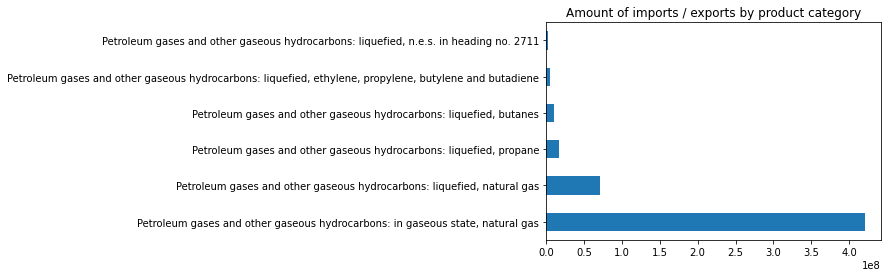

In [20]:
# Group the dataframe by product-description and quantity:
check = df_products.groupby("product_description")["quantity"].sum().sort_values(ascending = False)

# Plot the Barchart:
check.plot(kind = "barh")
plt.ylabel("")
plt.title("Amount of imports / exports by product category")
plt.show();

### Question 1: Has the overall import of gas increased or decreased

In [21]:
# Concat the dataframes to one big dataframe
df_text = pd.concat([dataframes_text[0],
                     dataframes_text[1],
                     dataframes_text[2],
                     dataframes_text[3],
                     dataframes_text[4]])

In [22]:
# Subset the data
df_text = df_text[["year", "exporter", "importer", "value", "quantity"]]
# Delete NA-Values
to_delete = df_text[df_text["quantity"].str.contains("NA") == True].index
df_text = df_text.drop(to_delete)
# Convert the datatype of "quantity" to float
df_text["quantity"] = df_text["quantity"].astype(float)
# Check the datatypes
df_text.dtypes

year          int64
exporter     object
importer     object
value       float64
quantity    float64
dtype: object

In [23]:
# Subset dataframes for countries
df_france = df_text[df_text["importer"] == "France"]
df_swiss = df_text[df_text["importer"] == "Switzerland"]
df_germany = df_text[df_text["importer"] == "Germany"]
df_norway = df_text[df_text["importer"] == "Norway"]
df_belgium = df_text[df_text["importer"] == "Belgium"]

#### Gas Importing Development Norway

Now we want to now how the overall quantity within the defined countries has changed over the time intervals.

In [24]:
# Norway Development by value
dev_norway_value = df_norway.groupby(["year"])['value'].sum().reset_index()
# Norway Development by quantity
dev_norway_qty = df_norway.groupby(["year"])['quantity'].sum().reset_index()

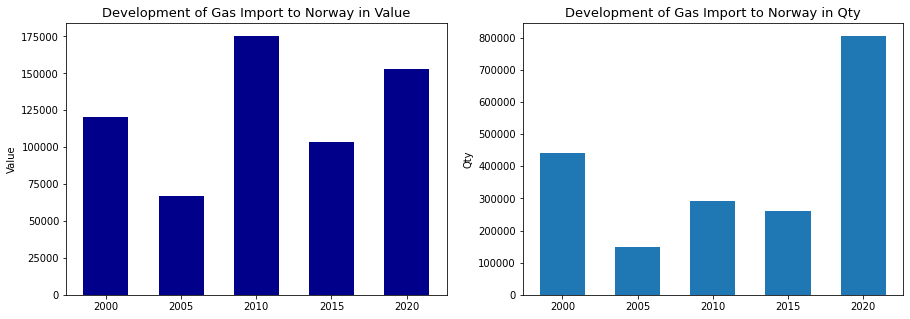

In [25]:
# Create seperate lists for the years, values and volume
year = dev_norway_value["year"].values.tolist()
value = dev_norway_value["value"].values.tolist()
qty = dev_norway_qty["quantity"].values.tolist()

# Plot two graphs, one for the value and one for the volume (qty):
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize=(15,5))
ax1.bar(year, value, width = 3, color = "darkblue")
ax1.set_title("Development of Gas Import to Norway in Value",
              size = 13)
ax1.set_ylabel("Value")
ax2.bar(year, qty, width = 3)
ax2.set_title("Development of Gas Import to Norway in Qty",
              size = 13)
ax2.set_ylabel("Qty")
plt.show();

##### Gas Importing Development France

In [26]:
# France Development by value
dev_france_value = df_france.groupby(["year"])['value'].sum().reset_index()
# France Development by quantity
dev_france_qty = df_france.groupby(["year"])['quantity'].sum().reset_index()

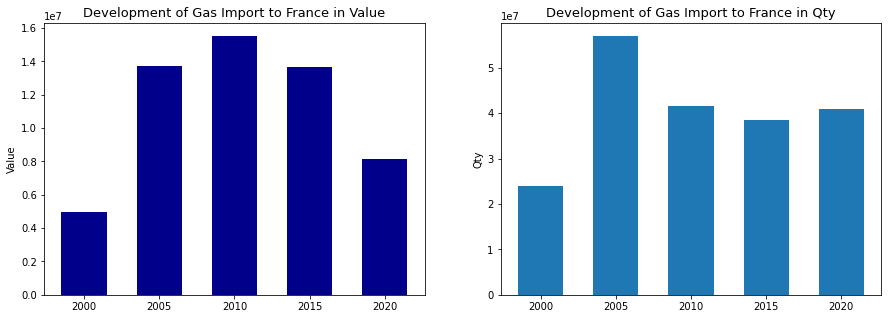

In [27]:
# Create seperate lists for the years, values and volume
year = dev_france_value["year"].values.tolist()
value = dev_france_value["value"].values.tolist()
qty = dev_france_qty["quantity"].values.tolist()

# Plot two graphs, one for the value and one for the volume (qty):
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize=(15,5))
ax1.bar(year, value, width = 3, color = "darkblue")
ax1.set_title("Development of Gas Import to France in Value",
              size = 13)
ax1.set_ylabel("Value")
ax2.bar(year, qty, width = 3)
ax2.set_title("Development of Gas Import to France in Qty",
              size = 13)
ax2.set_ylabel("Qty")
plt.show();

##### Gas Importing Development Switzerland

In [28]:
# Switzerland Development by value
dev_swiss_value = df_swiss.groupby(["year"])['value'].sum().reset_index()
# Switzerland Development by quantity
dev_swiss_qty = df_swiss.groupby(["year"])['quantity'].sum().reset_index()

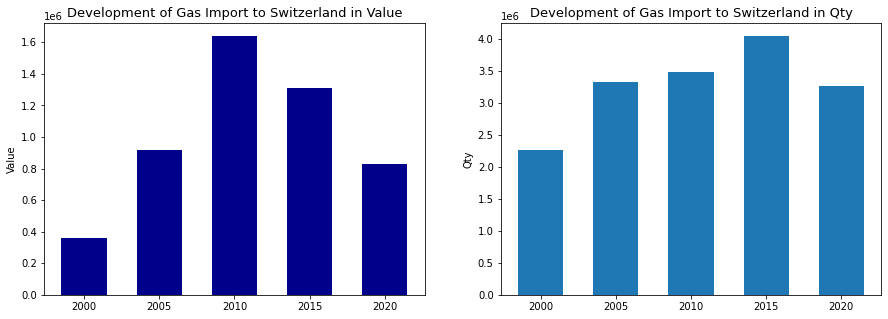

In [29]:
# Create seperate lists for the years, values and volume
year = dev_swiss_value["year"].values.tolist()
value = dev_swiss_value["value"].values.tolist()
qty = dev_swiss_qty["quantity"].values.tolist()

# Plot two graphs, one for the value and one for the volume (qty):
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize=(15,5))
ax1.bar(year, value, width = 3, color = "darkblue")
ax1.set_title("Development of Gas Import to Switzerland in Value",
              size = 13)
ax1.set_ylabel("Value")
ax2.bar(year, qty, width = 3)
ax2.set_title("Development of Gas Import to Switzerland in Qty",
              size = 13)
ax2.set_ylabel("Qty")
plt.show();

##### Gas Importing Development Germany

In [30]:
# Germany Development by value
dev_germany_value = df_germany.groupby(["year"])['value'].sum().reset_index()
# Germany Development by quantity
dev_germany_qty = df_germany.groupby(["year"])['quantity'].sum().reset_index()

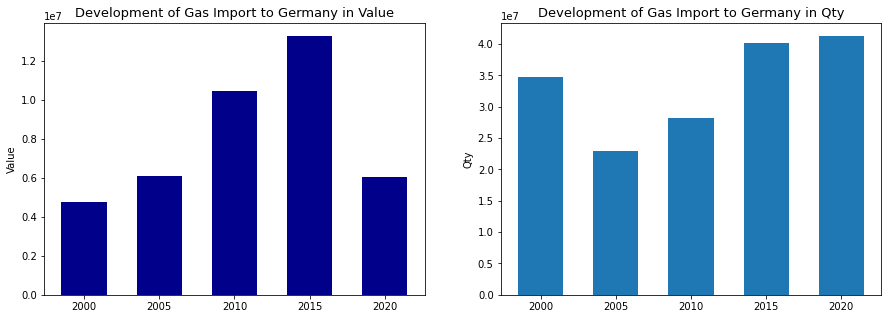

In [31]:
# Create seperate lists for the years, values and volume
year = dev_germany_value["year"].values.tolist()
value = dev_germany_value["value"].values.tolist()
qty = dev_germany_qty["quantity"].values.tolist()

# Plot two graphs, one for the value and one for the volume (qty):
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize=(15,5))
ax1.bar(year, value, width = 3, color = "darkblue")
ax1.set_title("Development of Gas Import to Germany in Value",
              size = 13)
ax1.set_ylabel("Value")
ax2.bar(year, qty, width = 3)
ax2.set_title("Development of Gas Import to Germany in Qty",
              size = 13)
ax2.set_ylabel("Qty")
plt.show();

### Question 2: Importing Countries

Now we want to check, which countries were the ones who exported the most to France, Germany and Switzerland. In the first place we are interested in the top 5 countries per year.

#### Define functions to get top exporters

In [32]:
# Define how many top exporting countries we want to access, in this case 5
Top_n = 5

In [33]:
def exporters_france(dataframe_france):

  """ This function is taking as an argument one dataframe and is subsetting
      this dataframe by years and is grouping the subsetted dataframes
      by year, exporter and importer with their respective quantity.
      The funtion is then returning the top 5 exporting / importing
      relationships and is returning five seperate dataframes. """

  # Define list of years for subsetting the dataframe
  years = [2000, 2005, 2010, 2015, 2020]

  # Subset the dataframe
  france_2000 = dataframe_france[dataframe_france["year"] == years[0]]
  france_2005 = dataframe_france[dataframe_france["year"] == years[1]]
  france_2010 = dataframe_france[dataframe_france["year"] == years[2]]
  france_2015 = dataframe_france[dataframe_france["year"] == years[3]]
  france_2020 = dataframe_france[dataframe_france["year"] == years[4]]

  # Group by country and qty
  france_2000 = france_2000.groupby(["year","exporter", "importer"])["quantity"].sum().sort_values(ascending = False).reset_index()
  france_2005 = france_2005.groupby(["year","exporter", "importer"])["quantity"].sum().sort_values(ascending = False).reset_index()
  france_2010 = france_2010.groupby(["year","exporter", "importer"])["quantity"].sum().sort_values(ascending = False).reset_index()
  france_2015 = france_2015.groupby(["year","exporter", "importer"])["quantity"].sum().sort_values(ascending = False).reset_index()
  france_2020 = france_2020.groupby(["year","exporter", "importer"])["quantity"].sum().sort_values(ascending = False).reset_index()


  # Only get the first 5 observations --> top 5 exporting countries
  france_2000 = france_2000.iloc[:Top_n]
  france_2005 = france_2005.iloc[:Top_n]
  france_2010 = france_2010.iloc[:Top_n]
  france_2015 = france_2015.iloc[:Top_n]
  france_2020 = france_2020.iloc[:Top_n]


  return france_2000, france_2005, france_2010, france_2015, france_2020

In [34]:
def exporters_germany(dataframe_germany):

  """ This function is taking as an argument one dataframe and is subsetting
      this dataframe by years and is grouping the subsetted dataframes
      by year, exporter and importer with their respective quantity.
      The funtion is then returning the top 5 exporting / importing
      relationships and is returning five seperate dataframes. """

  # Define list of years for subsetting the dataframe
  years = [2000, 2005, 2010, 2015, 2020]

  # Subset the dataframe
  germany_2000 = dataframe_germany[dataframe_germany["year"] == years[0]]
  germany_2005 = dataframe_germany[dataframe_germany["year"] == years[1]]
  germany_2010 = dataframe_germany[dataframe_germany["year"] == years[2]]
  germany_2015 = dataframe_germany[dataframe_germany["year"] == years[3]]
  germany_2020 = dataframe_germany[dataframe_germany["year"] == years[4]]

  # Group by country and qty
  germany_2000 = germany_2000.groupby(["year","exporter", "importer"])["quantity"].sum().sort_values(ascending = False).reset_index()
  germany_2005 = germany_2005.groupby(["year","exporter", "importer"])["quantity"].sum().sort_values(ascending = False).reset_index()
  germany_2010 = germany_2010.groupby(["year","exporter", "importer"])["quantity"].sum().sort_values(ascending = False).reset_index()
  germany_2015 = germany_2015.groupby(["year","exporter", "importer"])["quantity"].sum().sort_values(ascending = False).reset_index()
  germany_2020 = germany_2020.groupby(["year","exporter", "importer"])["quantity"].sum().sort_values(ascending = False).reset_index()

  # Only get the first 5 observations --> top 5 exporting countries
  germany_2000 = germany_2000.iloc[:Top_n]
  germany_2005 = germany_2005.iloc[:Top_n]
  germany_2010 = germany_2010.iloc[:Top_n]
  germany_2015 = germany_2015.iloc[:Top_n]
  germany_2020 = germany_2020.iloc[:Top_n]


  return germany_2000, germany_2005, germany_2010, germany_2015, germany_2020

In [35]:
def exporters_swiss(dataframe_swiss):

  """ This function is taking as an argument one dataframe and is subsetting
      this dataframe by years and is grouping the subsetted dataframes
      by year, exporter and importer with their respective quantity.
      The funtion is then returning the top 5 exporting / importing
      relationships and is returning five seperate dataframes. """

  # Define list of years for subsetting the dataframe
  years = [2000, 2005, 2010, 2015, 2020]

  # Subset the dataframe
  swiss_2000 = dataframe_swiss[dataframe_swiss["year"] == years[0]]
  swiss_2005 = dataframe_swiss[dataframe_swiss["year"] == years[1]]
  swiss_2010 = dataframe_swiss[dataframe_swiss["year"] == years[2]]
  swiss_2015 = dataframe_swiss[dataframe_swiss["year"] == years[3]]
  swiss_2020 = dataframe_swiss[dataframe_swiss["year"] == years[4]]

  # Group by country and qty
  swiss_2000 = swiss_2000.groupby(["year","exporter", "importer"])["quantity"].sum().sort_values(ascending = False).reset_index()
  swiss_2005 = swiss_2005.groupby(["year","exporter", "importer"])["quantity"].sum().sort_values(ascending = False).reset_index()
  swiss_2010 = swiss_2010.groupby(["year","exporter", "importer"])["quantity"].sum().sort_values(ascending = False).reset_index()
  swiss_2015 = swiss_2015.groupby(["year","exporter", "importer"])["quantity"].sum().sort_values(ascending = False).reset_index()
  swiss_2020 = swiss_2020.groupby(["year","exporter", "importer"])["quantity"].sum().sort_values(ascending = False).reset_index()

  # Only get the first 5 observations --> top 5 exporting countries
  swiss_2000 = swiss_2000.iloc[:Top_n]
  swiss_2005 = swiss_2005.iloc[:Top_n]
  swiss_2010 = swiss_2010.iloc[:Top_n]
  swiss_2015 = swiss_2015.iloc[:Top_n]
  swiss_2020 = swiss_2020.iloc[:Top_n]


  return swiss_2000, swiss_2005, swiss_2010, swiss_2015, swiss_2020

In [36]:
def exporters_norway(dataframe_norway):

  """ This function is taking as an argument one dataframe and is subsetting
      this dataframe by years and is grouping the subsetted dataframes
      by year, exporter and importer with their respective quantity.
      The funtion is then returning the top 5 exporting / importing
      relationships and is returning five seperate dataframes. """

  # Define list of years for subsetting the dataframe
  years = [2000, 2005, 2010, 2015, 2020]

  # Subset the dataframe
  norway_2000 = dataframe_norway[dataframe_norway["year"] == years[0]]
  norway_2005 = dataframe_norway[dataframe_norway["year"] == years[1]]
  norway_2010 = dataframe_norway[dataframe_norway["year"] == years[2]]
  norway_2015 = dataframe_norway[dataframe_norway["year"] == years[3]]
  norway_2020 = dataframe_norway[dataframe_norway["year"] == years[4]]

  # Group by country and qty
  norway_2000 = norway_2000.groupby(["year","exporter", "importer"])["quantity"].sum().sort_values(ascending = False).reset_index()
  norway_2005 = norway_2005.groupby(["year","exporter", "importer"])["quantity"].sum().sort_values(ascending = False).reset_index()
  norway_2010 = norway_2010.groupby(["year","exporter", "importer"])["quantity"].sum().sort_values(ascending = False).reset_index()
  norway_2015 = norway_2015.groupby(["year","exporter", "importer"])["quantity"].sum().sort_values(ascending = False).reset_index()
  norway_2020 = norway_2020.groupby(["year","exporter", "importer"])["quantity"].sum().sort_values(ascending = False).reset_index()


  # Only get the first 5 observations --> top 5 exporting countries
  norway_2000 = norway_2000.iloc[:Top_n]
  norway_2005 = norway_2005.iloc[:Top_n]
  norway_2010 = norway_2010.iloc[:Top_n]
  norway_2015 = norway_2015.iloc[:Top_n]
  norway_2020 = norway_2020.iloc[:Top_n]


  return norway_2000, norway_2005, norway_2010, norway_2015, norway_2020

In [37]:
def exporters_belgium(dataframe_belgium):

  """ This function is taking as an argument one dataframe and is subsetting
      this dataframe by years and is grouping the subsetted dataframes
      by year, exporter and importer with their respective quantity.
      The funtion is then returning the top 5 exporting / importing
      relationships and is returning five seperate dataframes. """

  # Define list of years for subsetting the dataframe
  years = [2000, 2005, 2010, 2015, 2020]

  # Subset the dataframe
  belgium_2000 = dataframe_belgium[dataframe_belgium["year"] == years[0]]
  belgium_2005 = dataframe_belgium[dataframe_belgium["year"] == years[1]]
  belgium_2010 = dataframe_belgium[dataframe_belgium["year"] == years[2]]
  belgium_2015 = dataframe_belgium[dataframe_belgium["year"] == years[3]]
  belgium_2020 = dataframe_belgium[dataframe_belgium["year"] == years[4]]

  # Group by country and qty
  belgium_2000 = belgium_2000.groupby(["year","exporter", "importer"])["quantity"].sum().sort_values(ascending = False).reset_index()
  belgium_2005 = belgium_2005.groupby(["year","exporter", "importer"])["quantity"].sum().sort_values(ascending = False).reset_index()
  belgium_2010 = belgium_2010.groupby(["year","exporter", "importer"])["quantity"].sum().sort_values(ascending = False).reset_index()
  belgium_2015 = belgium_2015.groupby(["year","exporter", "importer"])["quantity"].sum().sort_values(ascending = False).reset_index()
  belgium_2020 = belgium_2020.groupby(["year","exporter", "importer"])["quantity"].sum().sort_values(ascending = False).reset_index()


  # Only get the first 5 observations --> top 5 exporting countries
  belgium_2000 = belgium_2000.iloc[:Top_n]
  belgium_2005 = belgium_2005.iloc[:Top_n]
  belgium_2010 = belgium_2010.iloc[:Top_n]
  belgium_2015 = belgium_2015.iloc[:Top_n]
  belgium_2020 = belgium_2020.iloc[:Top_n]


  return belgium_2000, belgium_2005, belgium_2010, belgium_2015, belgium_2020

In [38]:
# Call the function and get the seperated dataframes
france_2000, france_2005, france_2010, france_2015, france_2020 = exporters_france(df_france)
germany_2000, germany_2005, germany_2010, germany_2015, germany_2020 = exporters_france(df_germany)
swiss_2000, swiss_2005, swiss_2010, swiss_2015, swiss_2020 = exporters_swiss(df_swiss)
norway_2000, norway_2005, norway_2010, norway_2015, norway_2020 = exporters_norway(df_norway)
belgium_2000, belgium_2005, belgium_2010, belgium_2015, belgium_2020 = exporters_belgium(df_belgium)

In [39]:
# Concate the dataframes once again to get only one dataframe per country
france_all_years = pd.concat([france_2000, france_2005, france_2010, france_2015, france_2020], axis=0)
germany_all_years = pd.concat([germany_2000, germany_2005, germany_2010, germany_2015, germany_2020], axis=0)
swiss_all_years = pd.concat([swiss_2000, swiss_2005, swiss_2010, swiss_2015, swiss_2020], axis=0)
norway_all_years = pd.concat([norway_2000, norway_2005, norway_2010, norway_2015, norway_2020], axis=0)
belgium_all_years = pd.concat([belgium_2000, belgium_2005, belgium_2010, belgium_2015, belgium_2020], axis=0)

In [40]:
# From the five dataframes a pivot table is constructed with an aggregation
# function for the sum of the quantity
france_all_years_pivot = pd.pivot_table(france_all_years, index=['year','exporter'], aggfunc= {'quantity': 'sum'})
germany_all_years_pivot = pd.pivot_table(germany_all_years, index=['year','exporter'], aggfunc= {'quantity': 'sum'})
swiss_all_years_pivot = pd.pivot_table(swiss_all_years, index=['year','exporter'], aggfunc= {'quantity': 'sum'})
norway_all_years_pivot = pd.pivot_table(norway_all_years, index=['year','exporter'], aggfunc= {'quantity': 'sum'})
belgium_all_years_pivot = pd.pivot_table(belgium_all_years, index=['year','exporter'], aggfunc= {'quantity': 'sum'})

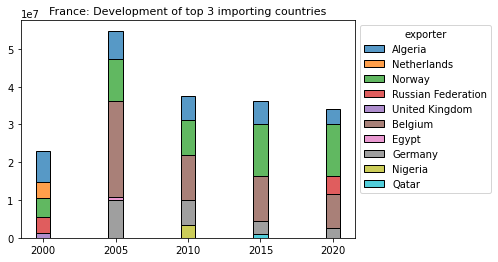

In [42]:
# Plot top exporting countries for France
ax = sns.histplot(data=france_all_years_pivot, x='year', hue='exporter', weights='quantity', discrete=True, multiple='stack')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.ylabel("")
plt.ylabel("")
plt.xlabel("")
plt.title("France: Development of top 3 importing countries", size = 11)
plt.show();

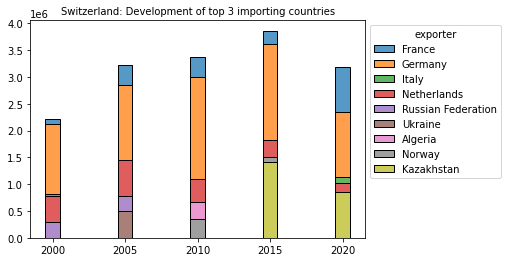

In [43]:
# Plot top exporting countries for Switzerland
ax = sns.histplot(data=swiss_all_years_pivot, x='year', hue='exporter', weights='quantity', discrete=True, multiple='stack')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.ylabel("")
plt.xlabel("")
plt.title("Switzerland: Development of top 3 importing countries", size = 10)
plt.show();

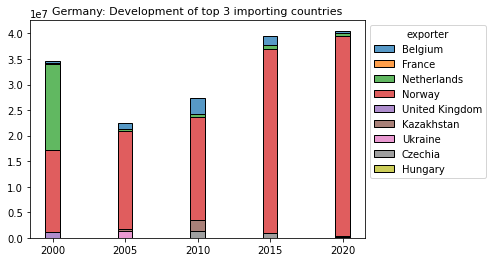

In [44]:
# Plot top exporting countries for Germany
ax = sns.histplot(data=germany_all_years_pivot, x='year', hue='exporter', weights='quantity', discrete=True, multiple='stack')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.ylabel("")
plt.xlabel("")
plt.title("Germany: Development of top 3 importing countries", size = 11)
plt.show();

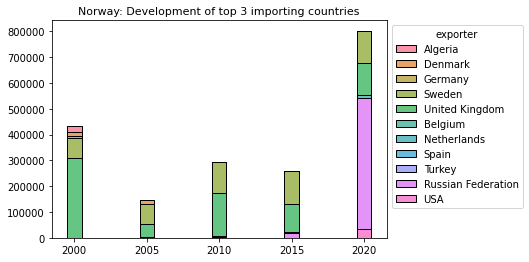

In [45]:
# Plot top exporting countries for Norway
ax = sns.histplot(data=norway_all_years_pivot, x='year', hue='exporter', weights='quantity', discrete=True, multiple='stack')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.ylabel("")
plt.xlabel("")
plt.title("Norway: Development of top 3 importing countries", size = 11)
plt.show();

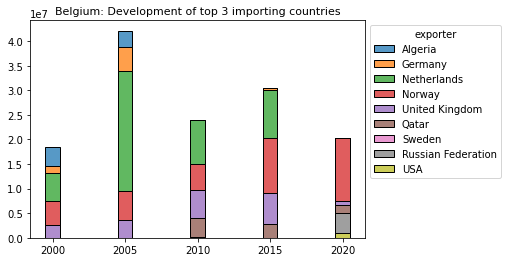

In [46]:
# Plot top exporting countries for Belgium
ax = sns.histplot(data=belgium_all_years_pivot, x='year', hue='exporter', weights='quantity', discrete=True, multiple='stack')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.ylabel("")
plt.xlabel("")
plt.title("Belgium: Development of top 3 importing countries", size = 11)
plt.show();

#### Define function to get all exporters

In [112]:
def all_exporters(df1, df2, df3):

  """The dunction takes in three dataframes for the countries Germany, France
    and Switzerland and is concatenating and subsetting the dataframe"""

  # Define list of years for subsetting the dataframe
  years = [2000, 2005, 2010, 2015, 2020]

  # Concat the dataframes
  dataframe_all = pd.concat([df1, df2, df3])

  # Subset the dataframe
  dataframe_2000 = dataframe_all[dataframe_all["year"] == years[0]].reset_index()
  dataframe_2005 = dataframe_all[dataframe_all["year"] == years[1]].reset_index()
  dataframe_2010 = dataframe_all[dataframe_all["year"] == years[2]].reset_index()
  dataframe_2015 = dataframe_all[dataframe_all["year"] == years[3]].reset_index()
  dataframe_2020 = dataframe_all[dataframe_all["year"] == years[4]].reset_index()

  return dataframe_2000, dataframe_2005, dataframe_2010, dataframe_2015, dataframe_2020

In [113]:
# Call the function and return five dataframes for the defined time-intervals
dataframe_2000, dataframe_2005, dataframe_2010, dataframe_2015, dataframe_2020 = all_exporters(df_france, df_germany, df_swiss)

## Network Analysis

In [114]:
!pip install pathpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [115]:
import pathpy as pp
import networkx as nx
import random
from networkx import path_graph, random_layout

### Germany, Switzerland and France: Network with all connections

In [51]:
# Set random seed for reproducability
seed = 44
random.seed(seed)
np.random.seed(seed)

In [52]:
# Define five graphs, for each year one graph
G1 = nx.from_pandas_edgelist(dataframe_2000, 'importer', 'exporter',
                            create_using = nx.Graph())

G2 = nx.from_pandas_edgelist(dataframe_2005, 'importer', 'exporter',
                            create_using = nx.Graph())

G3 = nx.from_pandas_edgelist(dataframe_2010, 'importer', 'exporter',
                            create_using = nx.Graph())

G4 = nx.from_pandas_edgelist(dataframe_2015, 'importer', 'exporter',
                            create_using = nx.Graph())

G5 = nx.from_pandas_edgelist(dataframe_2020, 'importer', 'exporter',
                            create_using = nx.Graph())

In [53]:
def colors(graph1, graph2, graph3, graph4, graph5):

  """ This function is taking five defined graphs as an argument and is 
      transforming the node-name in the graph object in such a way that
      the importing countries (Switzerland, Germany and France) are assigned
      one color and the exporting countries another color """

  # Define new dataframe with defined countries 
  color_frame = pd.DataFrame({ 'ID':['Switzerland', 'France', 'Germany'], 'myvalue':["1", "1", "1"] })
  color_frame = color_frame.set_index('ID')

  # Define the frame for reindexing
  color_frame1 = color_frame.reindex(graph1.nodes())
  color_frame2 = color_frame.reindex(graph2.nodes())
  color_frame3 = color_frame.reindex(graph3.nodes())
  color_frame4 = color_frame.reindex(graph4.nodes())
  color_frame5 = color_frame.reindex(graph5.nodes())

  color_frames = [color_frame1, color_frame2, color_frame3, color_frame4, color_frame5]


  for dataframe in color_frames:
    check = []
    for i in dataframe["myvalue"]:
      if (i == "1"):
        check.append(i)
      else:
        check.append("2")
    dataframe["myvalue2"] = check
    dataframe['myvalue2'] = pd.Categorical(dataframe['myvalue2'])

  
  return color_frames

In [54]:
# Call the function
color_frames = colors(G1, G2, G3, G4, G5)

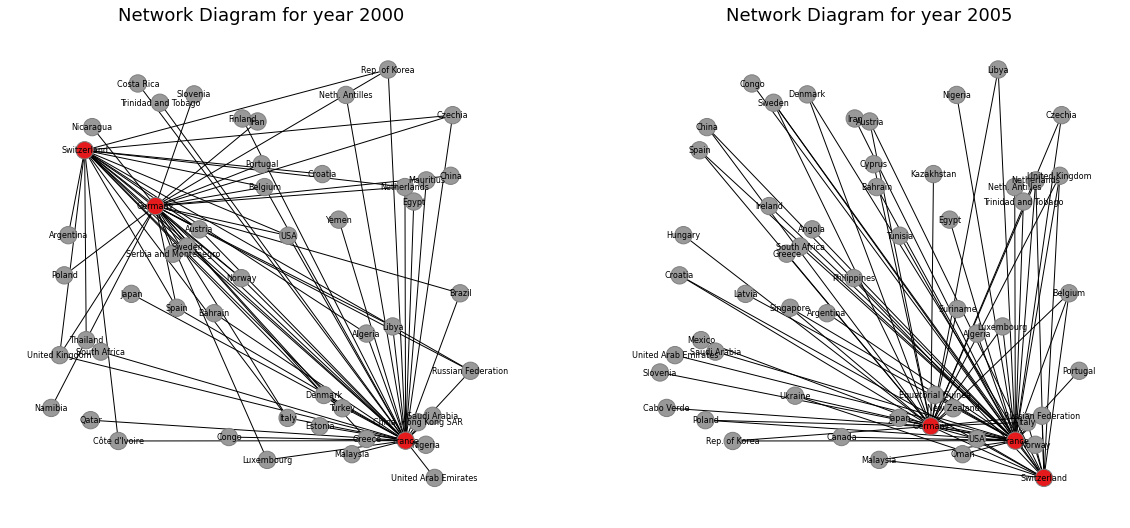

In [55]:
# Set overall figure size
f = plt.figure(figsize=(20,20))
f.tight_layout()

# Subplot 1
plt.subplot(2, 2, 1)
pos = nx.random_layout(G1, seed = seed)
nx.draw(G1, pos=pos, with_labels = True,
        font_size = 8, edgecolors='gray',
        node_color = color_frames[0]['myvalue2'].cat.codes,
        cmap=plt.cm.Set1)
plt.title('Network Diagram for year 2000', fontsize=18)

# Subplot 2
plt.subplot(2, 2, 2)
pos = nx.random_layout(G2, seed = seed)
nx.draw(G2, pos=pos, with_labels = True,
        font_size = 8, edgecolors='gray',
        node_color = color_frames[1]['myvalue2'].cat.codes,
        cmap=plt.cm.Set1)
plt.title('Network Diagram for year 2005', fontsize=18)
plt.show();

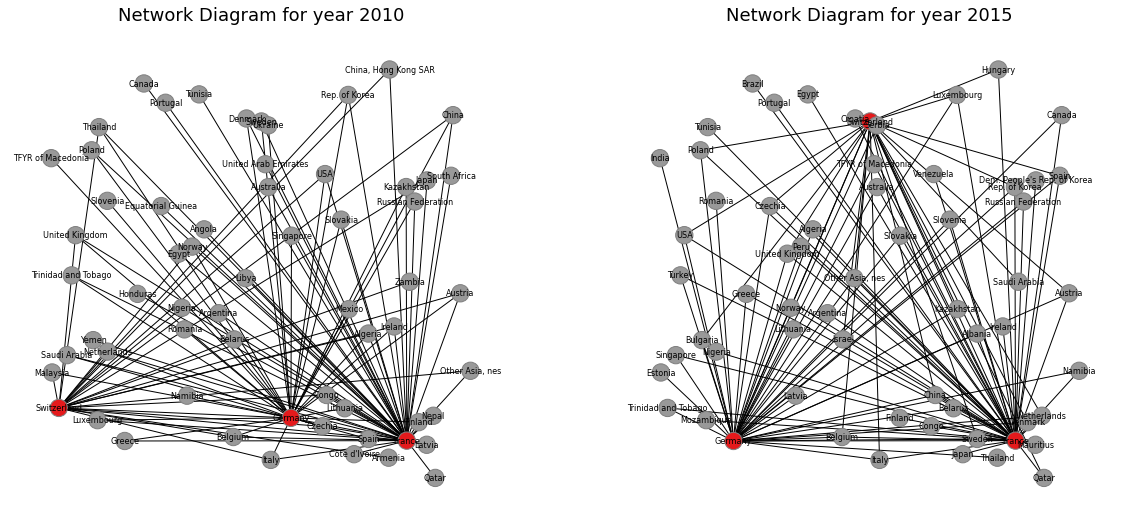

In [56]:
# Set overall figure size
f = plt.figure(figsize=(20,20))
f.tight_layout()

# Subplot 1
plt.subplot(2, 2, 1)
pos = nx.random_layout(G3, seed = seed)
nx.draw(G3, pos=pos, with_labels = True,
        font_size = 8, edgecolors='gray',
        node_color = color_frames[2]['myvalue2'].cat.codes,
        cmap=plt.cm.Set1)
plt.title('Network Diagram for year 2010', fontsize=18)

# Subplot 2
plt.subplot(2, 2, 2)
pos = nx.random_layout(G4, seed = seed)
nx.draw(G4, pos=pos, with_labels = True,
        font_size = 8, edgecolors='gray',
        node_color = color_frames[3]['myvalue2'].cat.codes,
        cmap=plt.cm.Set1)
plt.title('Network Diagram for year 2015', fontsize=18)
plt.show();

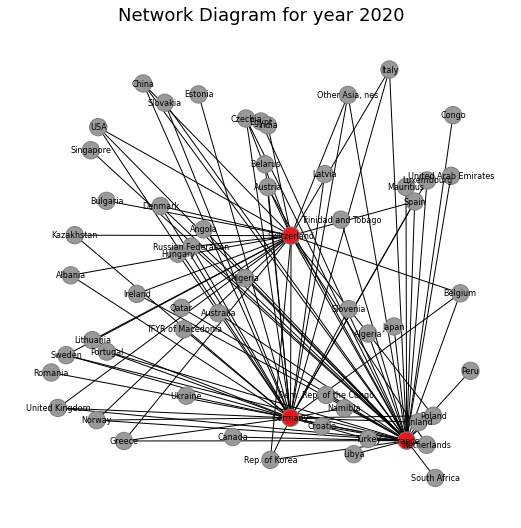

In [57]:
# Set overall figure size
f = plt.figure(figsize=(20,20))
f.tight_layout()

# Subplot 1
plt.subplot(2, 2, 1)
pos = nx.random_layout(G5, seed = seed)
nx.draw(G5, pos=pos, with_labels = True,
        font_size = 8, edgecolors='gray',
        node_color = color_frames[4]['myvalue2'].cat.codes,
        cmap=plt.cm.Set1)
plt.title('Network Diagram for year 2020', fontsize=18)
plt.show();

#### Compute Neigbor-Nodes

How many neigbors does each node have? This can be assessed with the degree measure. Also the closeness centrality is getting computed in order to see whether something extraordinary can be expected. We do not assume to find something special since the degree is high for the defined importing countries.

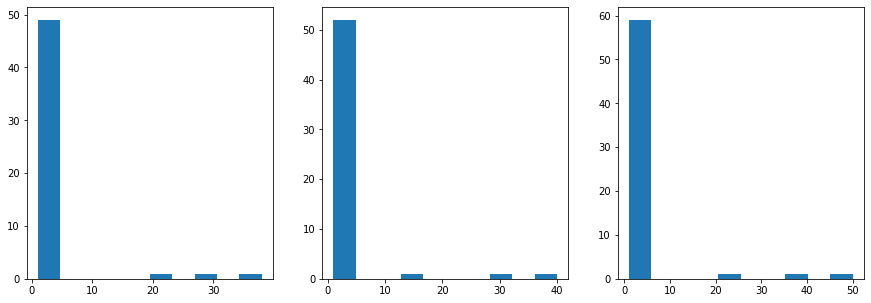

In [58]:
# We defined initially the five graphs G1-5
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize=(15,5))
ax1.hist([v for k,v in nx.degree(G1)])
ax2.hist([v for k,v in nx.degree(G2)])
ax3.hist([v for k,v in nx.degree(G3)])
plt.show();

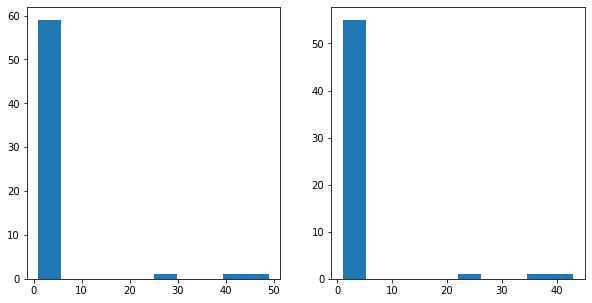

In [59]:
# We defined initially the five graphs G1-5
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize=(10,5))
ax1.hist([v for k,v in nx.degree(G4)])
ax2.hist([v for k,v in nx.degree(G5)])
plt.show();

#### Compute Closeness-Centrality

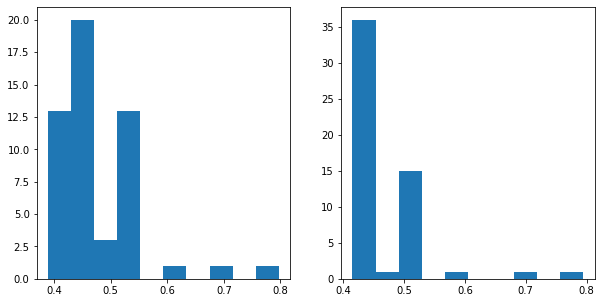

In [60]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize=(10,5))
ax1.hist(nx.centrality.closeness_centrality(G1).values());
ax2.hist(nx.centrality.closeness_centrality(G2).values());

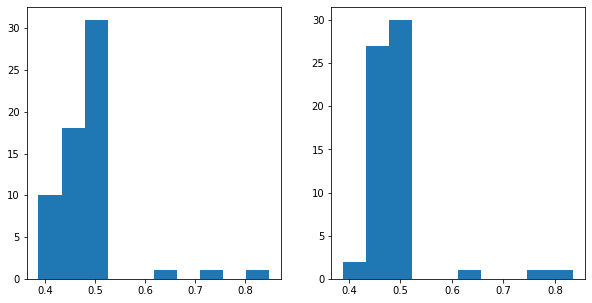

In [61]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize=(10,5))
ax1.hist(nx.centrality.closeness_centrality(G3).values());
ax2.hist(nx.centrality.closeness_centrality(G4).values());

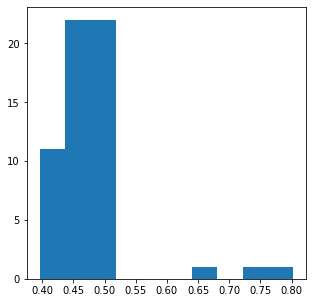

In [62]:
fig, (ax1) = plt.subplots(nrows = 1, ncols = 1, figsize=(5,5))
ax1.hist(nx.centrality.closeness_centrality(G5).values());

### Germany, Switzerland and France: Weighted Node Size

In [63]:
def top10_exporters_dataframes(df1, df2, df3, df4, df5):

  """ This function is taking five dataframes with all exporter - importer
      relationship as an argument and return one object containing five 
      different dataframes. Each of these dataframes hold the percentage of 
      total of the exported volume by year. """

  # Define the input parameters as a list
  dataframes = [df1, df2, df3, df4, df5]

  # Define the years as a list
  years = [2000, 2005, 2010, 2015, 2020]
  # Define new list where cleaned dataframes will be stored to
  dataframes_clean = []
  counter = 0
  Top_n = 10

  # Iterate over dataframes and subset them
  for dataframe in dataframes:
    dataframe = dataframe[dataframe["year"] == years[counter]]
    counter += 1
    dataframe = dataframe[["year", "exporter", "importer", "quantity"]]
    dataframe = dataframe.groupby(["year","exporter", "importer"])["quantity"].sum().sort_values(ascending = False).reset_index()
    dataframe = dataframe.iloc[:Top_n]
    dataframe["percentage_of_total"] = (dataframe['quantity'] / dataframe['quantity'].sum()) * 100
    dataframes_clean.append(dataframe)

  return dataframes_clean

In [64]:
# Call the functions
cleaned_dataframes = top10_exporters_dataframes(dataframe_2000, dataframe_2005, dataframe_2010, dataframe_2015, dataframe_2020)

In [65]:
# Print out one dataframe to check. The last column holds the percentage of
# total. Meaning in the below dataframe: out of 10 observations or relations
# Norway exported 48.8% of the volume to Germany.
cleaned_dataframes[4]

,year,exporter,importer,quantity,percentage_of_total
0,2020,Norway,Germany,3.900198e+07,48.855474
1,2020,Norway,France,1.359045e+07,17.023954
2,2020,Belgium,France,8.963406e+06,11.227930
3,2020,Russian Federation,France,4.747484e+06,5.946893
4,2020,Algeria,France,4.002978e+06,5.014294
5,2020,Germany,France,2.718625e+06,3.405461
6,2020,USA,France,2.425078e+06,3.037753
7,2020,Nigeria,France,2.317184e+06,2.902600
8,2020,Germany,Switzerland,1.211819e+06,1.517974
9,2020,Kazakhstan,Switzerland,8.523342e+05,1.067669


In [66]:
# Define five seperate graph-objects from the dataframe
G2000_check = nx.from_pandas_edgelist(cleaned_dataframes[0], 'exporter', 'importer', create_using=nx.Graph())
G2005_check = nx.from_pandas_edgelist(cleaned_dataframes[1], 'exporter', 'importer', create_using=nx.Graph())
G2010_check = nx.from_pandas_edgelist(cleaned_dataframes[2], 'exporter', 'importer', create_using=nx.Graph())
G2015_check = nx.from_pandas_edgelist(cleaned_dataframes[3], 'exporter', 'importer', create_using=nx.Graph())
G2020_check = nx.from_pandas_edgelist(cleaned_dataframes[4], 'exporter', 'importer', create_using=nx.Graph())

In [67]:
# Make list with all nodes
node_reference_2000 = [exporter for exporter in G2000_check.nodes()]
node_reference_2005 = [exporter for exporter in G2005_check.nodes()]
node_reference_2010 = [exporter for exporter in G2010_check.nodes()]
node_reference_2015 = [exporter for exporter in G2015_check.nodes()]
node_reference_2020 = [exporter for exporter in G2020_check.nodes()]

# Make new frame with values
exporter_2000 = cleaned_dataframes[0].groupby(["exporter"])["percentage_of_total"].sum().reset_index().sort_values(by = "percentage_of_total", ascending = False)
exporter_2000 = cleaned_dataframes[0].groupby(["exporter"])["percentage_of_total"].sum()

exporter_2005 = cleaned_dataframes[1].groupby(["exporter"])["percentage_of_total"].sum().reset_index().sort_values(by = "percentage_of_total", ascending = False)
exporter_2005 = cleaned_dataframes[1].groupby(["exporter"])["percentage_of_total"].sum()

exporter_2010 = cleaned_dataframes[2].groupby(["exporter"])["percentage_of_total"].sum().reset_index().sort_values(by = "percentage_of_total", ascending = False)
exporter_2010 = cleaned_dataframes[2].groupby(["exporter"])["percentage_of_total"].sum()

exporter_2015 = cleaned_dataframes[3].groupby(["exporter"])["percentage_of_total"].sum().reset_index().sort_values(by = "percentage_of_total", ascending = False)
exporter_2015 = cleaned_dataframes[3].groupby(["exporter"])["percentage_of_total"].sum()

exporter_2020 = cleaned_dataframes[4].groupby(["exporter"])["percentage_of_total"].sum().reset_index().sort_values(by = "percentage_of_total", ascending = False)
exporter_2020 = cleaned_dataframes[4].groupby(["exporter"])["percentage_of_total"].sum()

In [68]:
# Create node reference variables holding the names of the nodes for each year
node_reference_2000 = pd.DataFrame(node_reference_2000)
node_reference_2000.rename(columns={0: "Nodes"}, inplace = True)

node_reference_2005 = pd.DataFrame(node_reference_2005)
node_reference_2005.rename(columns={0: "Nodes"}, inplace = True)

node_reference_2010 = pd.DataFrame(node_reference_2010)
node_reference_2010.rename(columns={0: "Nodes"}, inplace = True)

node_reference_2015 = pd.DataFrame(node_reference_2015)
node_reference_2015.rename(columns={0: "Nodes"}, inplace = True)

node_reference_2020 = pd.DataFrame(node_reference_2020)
node_reference_2020.rename(columns={0: "Nodes"}, inplace = True)

# Create list of values which will be used to adjust the node size
values_2000 = node_reference_2000.join(exporter_2000, on = "Nodes")
values_2000 = list(values_2000["percentage_of_total"])
values_2000 = [value*100 for value in values_2000]

values_2005 = node_reference_2005.join(exporter_2005, on = "Nodes")
values_2005 = list(values_2005["percentage_of_total"])
values_2005 = [value*100 for value in values_2005]

values_2010 = node_reference_2010.join(exporter_2010, on = "Nodes")
values_2010 = list(values_2010["percentage_of_total"])
values_2010 = [value*100 for value in values_2010]

values_2015 = node_reference_2015.join(exporter_2015, on = "Nodes")
values_2015 = list(values_2015["percentage_of_total"])
values_2015 = [value*100 for value in values_2015]

values_2020 = node_reference_2020.join(exporter_2020, on = "Nodes")
values_2020 = list(values_2020["percentage_of_total"])
values_2020 = [value*100 for value in values_2020]

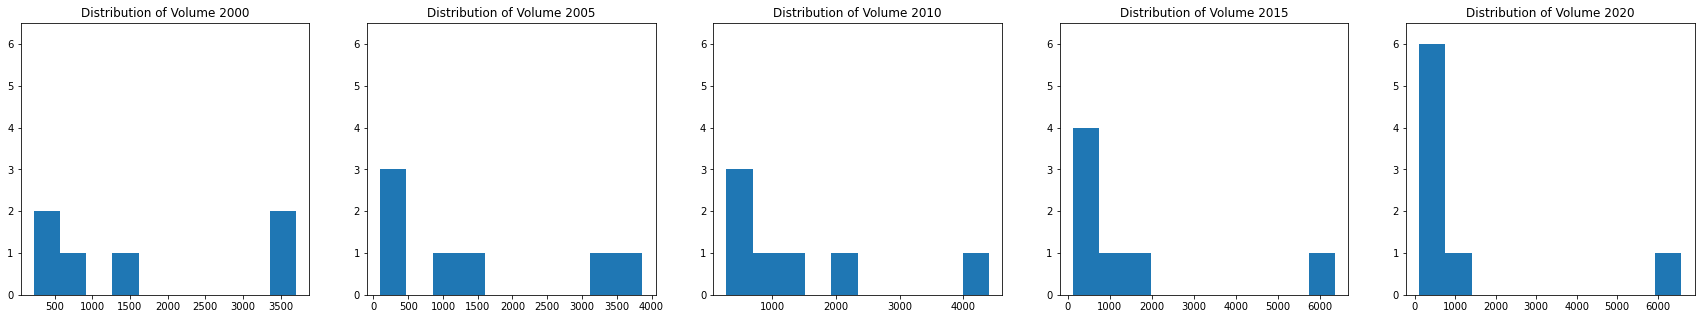

In [69]:
# Now the distributions based on the volumes are plotted for each year
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows = 1, ncols = 5, figsize=(30,5))
ax1.hist(values_2000)
ax1.set_title("Distribution of Volume 2000")
ax1.set_ylim([0, 6.5])

ax2.hist(values_2005)
ax2.set_title("Distribution of Volume 2005")
ax2.set_ylim([0, 6.5])

ax3.hist(values_2010)
ax3.set_title("Distribution of Volume 2010")
ax3.set_ylim([0, 6.5])

ax4.hist(values_2015)
ax4.set_title("Distribution of Volume 2015")
ax4.set_ylim([0, 6.5])

ax5.hist(values_2020)
ax5.set_title("Distribution of Volume 2020")
ax5.set_ylim([0, 6.5])

plt.show();

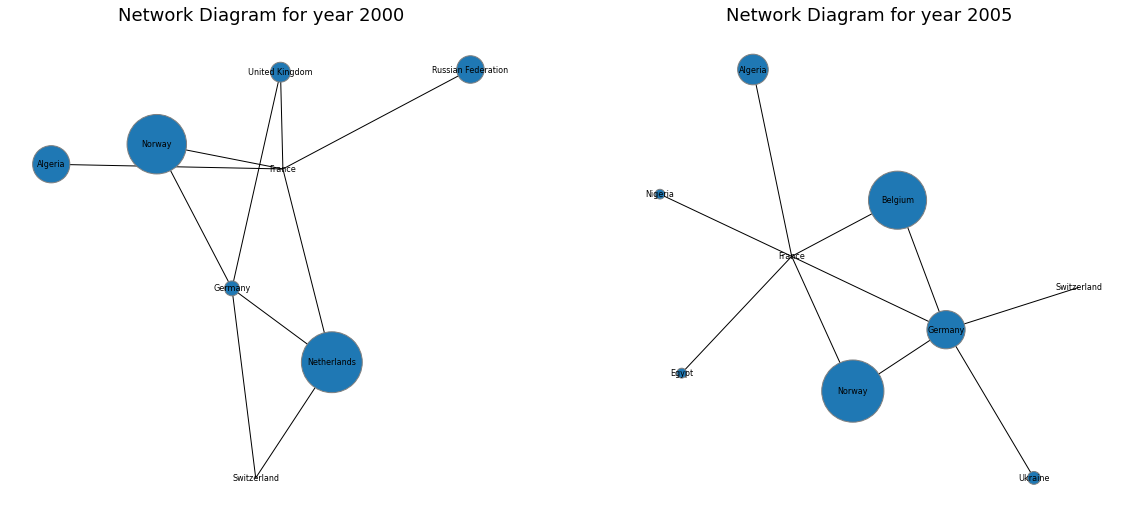

In [70]:
# Set overall figure size
f = plt.figure(figsize=(20,20))

# Subplot 1
plt.subplot(2, 2, 1)
nx.draw(G2000_check, with_labels=True, node_size = values_2000,
        font_size = 8, edgecolors='gray')
plt.title('Network Diagram for year 2000', fontsize=18)

# Subplot 2
plt.subplot(2, 2, 2)
nx.draw(G2005_check, with_labels=True, node_size = values_2005,
        font_size = 8, edgecolors='gray')
plt.title('Network Diagram for year 2005', fontsize=18)
plt.show();

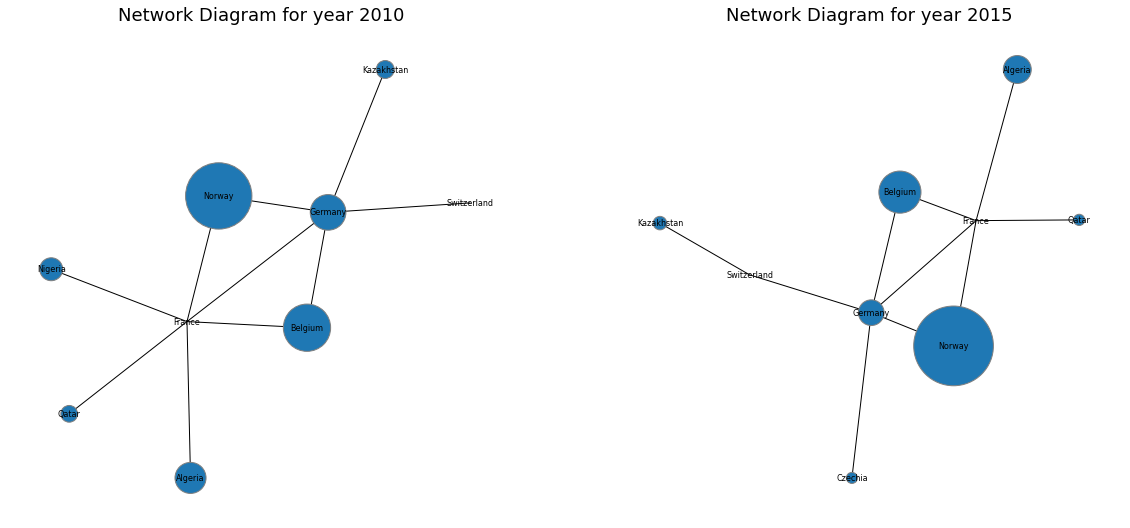

In [71]:
# Set overall figure size
f = plt.figure(figsize=(20,20))

# Subplot 1
plt.subplot(2, 2, 1)
nx.draw(G2010_check, with_labels=True, node_size = values_2010,
        font_size = 8, edgecolors='gray')
plt.title('Network Diagram for year 2010', fontsize=18)

# Subplot 2
plt.subplot(2, 2, 2)
nx.draw(G2015_check, with_labels=True, node_size = values_2015,
        font_size = 8, edgecolors='gray')
plt.title('Network Diagram for year 2015', fontsize=18)
plt.show();

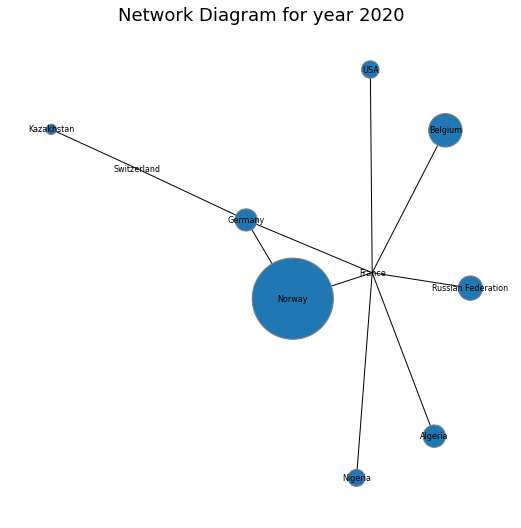

In [72]:
# Set overall figure size
f = plt.figure(figsize=(20,20))

# Subplot 1
plt.subplot(2, 2, 1)
nx.draw(G2020_check, with_labels=True, node_size = values_2020,
        font_size = 8, edgecolors='gray')
plt.title('Network Diagram for year 2020', fontsize=18)
plt.show();